# PRESENT STOCK DATA ANALYSIS

Enter category of data ('month', 'week', 'daily', 'intraday'): intraday
enter the interval   '5min', '1min' 1min


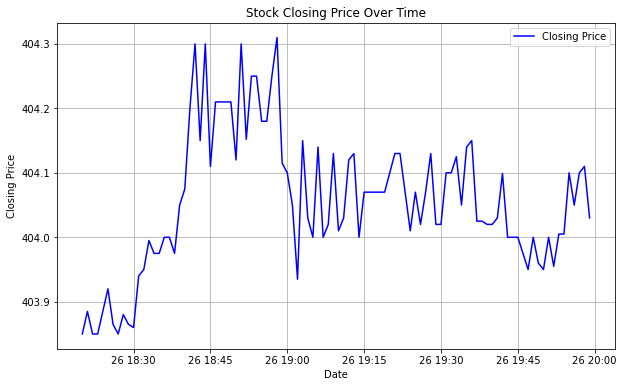

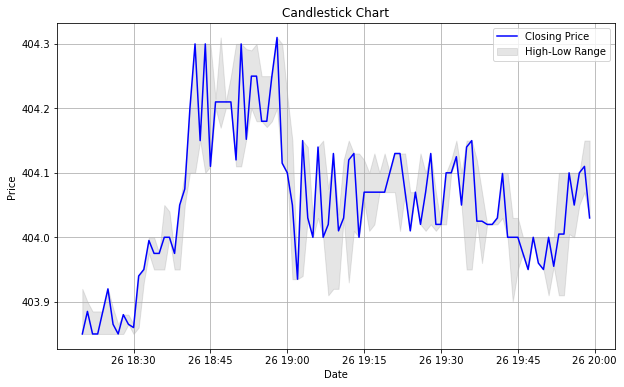

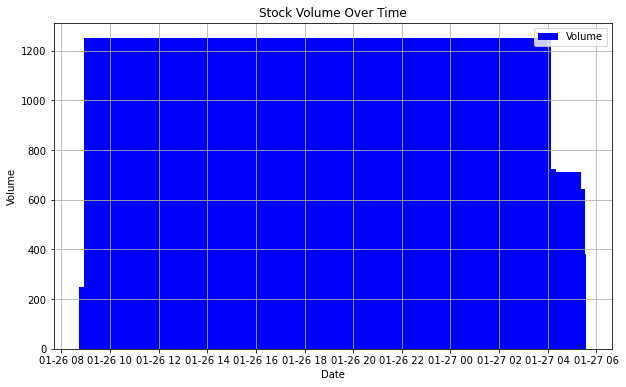

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries

api_key = "TQOVXXPMTMLWKNZY"
ts = TimeSeries(key=api_key, output_format='pandas')
def start():
    event = input("Enter category of data ('month', 'week', 'daily', 'intraday'): ")
    
    def daily_intraday(df):
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['4. close'], label='Closing Price', color='b')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.title('Stock Closing Price Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['4. close'], label='Closing Price', color='b')
        plt.fill_between(df.index, df['3. low'], df['2. high'], alpha=0.2, label='High-Low Range', color='gray')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Candlestick Chart')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.bar(df.index, df['5. volume'], label='Volume', color='b')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.title('Stock Volume Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    def week_month(df):
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['5. adjusted close'], label='Adjusted Close', color='b')
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.title('Stock Closing Price Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['5. adjusted close'], label='Adjusted Close', color='b')
        plt.fill_between(df.index, df['3. low'], df['2. high'], alpha=0.2, label='High-Low Range', color='gray')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title('Candlestick Chart')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.figure(figsize=(10, 6))
        plt.bar(df.index, df['6. volume'], label='Volume', color='b')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.title('Stock Volume Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()
        if '7. dividend amount' in df.columns:
            plt.figure(figsize=(10, 6))
            plt.bar(df.index, df['7. dividend amount'], label='Dividend Amount', color='g')
            plt.xlabel('Date')
            plt.ylabel('Dividend Amount')
            plt.title('Dividend Amount Over Time')
            plt.legend()
            plt.grid(True)
            plt.show()

    if event == "week":
        df, meta_data = ts.get_weekly_adjusted('MSFT')
        week_month(df)
    elif event == "month":
        #df, meta_data = ts.get_monthly_adjusted('MSFT',outputsize='compact')
        df, meta_data = ts.get_monthly_adjusted('MSFT')
        week_month(df)
    elif event == "daily":
        df, meta_data = ts.get_daily('MSFT',outputsize='compact')
        daily_intraday(df)
    elif event == "intraday":
        f=input("enter the interval   '5min', '1min' "  )
        df, meta_data = ts.get_intraday('MSFT', interval=f,outputsize='compact')
        daily_intraday(df)
    else:
        print("Enter the category correctly")
        start()
start()

# API DATASET SAMPLES

In [26]:
df=ts.get_weekly_adjusted('TSLA')
df[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2024-01-26,212.26,217.80,180.0600,183.25,183.2500,642909480.0,0.0
2024-01-19,215.10,223.49,207.5600,212.19,212.1900,429375220.0,0.0
2024-01-12,236.14,241.25,217.1501,218.89,218.8900,502418170.0,0.0
2024-01-05,250.08,251.25,234.9001,237.49,237.4900,420606080.0,0.0
2023-12-29,254.49,265.13,247.4300,248.48,248.4800,407257251.0,0.0
...,...,...,...,...,...,...,...
2010-08-06,20.50,22.18,19.5200,19.59,1.3060,4399700.0,0.0
2010-07-30,21.50,21.50,19.5500,19.94,1.3293,3052000.0,0.0
2010-07-23,21.37,22.25,19.5000,21.29,1.4193,7175700.0,0.0


In [27]:
df=ts.get_monthly_adjusted('TSLA')
df[0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2024-01-26,250.08,251.25,180.06,183.250,183.2500,1.995309e+09,0.0
2023-12-29,233.14,265.13,228.20,248.480,248.4800,2.293890e+09,0.0
2023-11-30,204.04,252.75,197.85,240.080,240.0800,2.652011e+09,0.0
2023-10-31,244.81,268.94,194.07,200.840,200.8400,2.591244e+09,0.0
2023-09-29,257.26,278.98,234.58,250.220,250.2200,2.440634e+09,0.0
...,...,...,...,...,...,...,...
2010-11-30,21.94,36.00,21.05,35.330,2.3553,2.831510e+07,0.0
2010-10-29,20.69,21.87,20.00,21.840,1.4560,6.547800e+06,0.0
2010-09-30,19.62,23.16,19.50,20.405,1.3603,1.804590e+07,0.0


In [28]:
df=ts.get_daily('MSFT',outputsize='full')
df[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-01-26,404.37,406.17,402.4300,403.93,17803271.0
2024-01-25,404.32,407.01,402.5294,404.87,21021155.0
2024-01-24,401.54,405.63,400.4500,402.56,23281889.0
2024-01-23,395.75,399.38,393.9300,398.90,20525882.0
2024-01-22,400.02,400.62,393.5900,396.51,27016902.0
...,...,...,...,...,...
1999-11-05,91.81,92.87,90.5000,91.56,35083700.0
1999-11-04,92.31,92.75,90.3100,91.75,27119700.0
1999-11-03,92.94,93.50,91.5000,92.00,22258500.0


In [29]:
#1min, 5min, 15min, 30min, 60min
df=ts.get_intraday('TSLA', interval='60min',outputsize='full')
df[0]

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-01-26 19:00:00,184.181,184.200,184.000,184.08,164327.0
2024-01-26 18:00:00,183.850,184.300,183.600,184.19,142336.0
2024-01-26 17:00:00,183.480,190.800,182.160,183.87,181484.0
2024-01-26 16:00:00,183.220,246.142,151.110,183.45,4580931.0
2024-01-26 15:00:00,183.270,183.470,182.380,183.22,12701610.0
...,...,...,...,...,...
2024-01-05 08:00:00,236.110,238.840,235.269,236.47,1071681.0
2024-01-05 07:00:00,236.260,236.770,235.680,236.76,196170.0
2024-01-05 06:00:00,236.010,236.290,235.610,236.28,66312.0


In [30]:
DF=ts.get_intraday(symbol="TSLA", interval="5min", outputsize='full')
DF[0]

ValueError: Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.

# M.L MODEL TRAINING AND COMPORISION WITH OTHER MODELS

# MODEL TO PREDICT HIGH AND LOW ATTRIBUTES 

Metrics for '2. high' Predictions:
R-squared: 0.999916067534478


Metrics for '3. low' Predictions:
R-squared: 0.9998788273727233


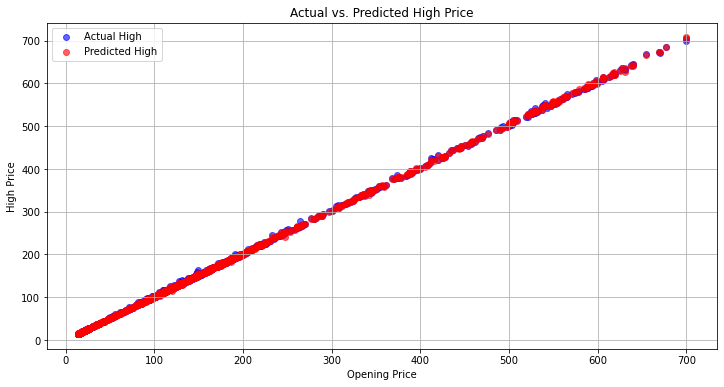

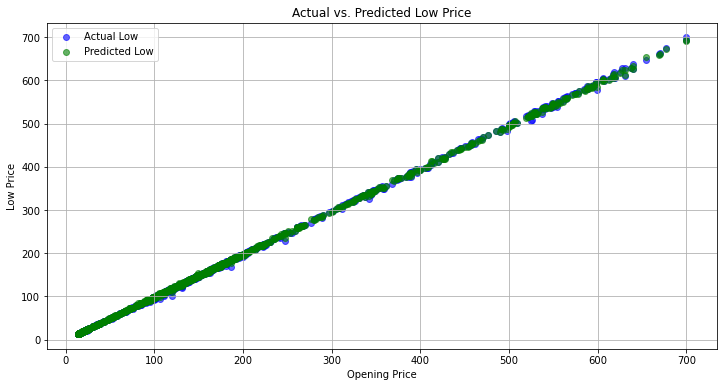

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
api_key =  "TQOVXXPMTMLWKNZY"
symbol = 'AAPL' 
ts = TimeSeries(key=api_key, output_format='pandas')
data, _ = ts.get_daily(symbol, outputsize='full')
X = data[['1. open', '4. close']]
y_high = data['2. high']
y_low = data['3. low']
X_train, X_test, y_high_train, y_high_test, y_low_train, y_low_test = train_test_split(
    X, y_high, y_low, test_size=0.2, random_state=42)
model_high = LinearRegression()
model_low = LinearRegression()

model_high.fit(X_train, y_high_train)
model_low.fit(X_train, y_low_train)
y_high_pred = model_high.predict(X_test)
y_low_pred = model_low.predict(X_test)
mse_high = mean_squared_error(y_high_test, y_high_pred)
mae_high = mean_absolute_error(y_high_test, y_high_pred)
r2_high = r2_score(y_high_test, y_high_pred)
mse_low = mean_squared_error(y_low_test, y_low_pred)
mae_low = mean_absolute_error(y_low_test, y_low_pred)
r2_low = r2_score(y_low_test, y_low_pred)
print("Metrics for '2. high' Predictions:")
#print(f"MSE: {mse_high}")
#print(f"MAE: {mae_high}")
print(f"R-squared: {r2_high}\n")
print("\nMetrics for '3. low' Predictions:")
#print(f"MSE: {mse_low}")
#print(f"MAE: {mae_low}")
print(f"R-squared: {r2_low}")
plt.figure(figsize=(12, 6))
plt.scatter(X_test['1. open'], y_high_test, color='blue', label='Actual High', alpha=0.6)
plt.scatter(X_test['1. open'], y_high_pred, color='red', label='Predicted High', alpha=0.6)
plt.xlabel('Opening Price')
plt.ylabel('High Price')
plt.title('Actual vs. Predicted High Price')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.scatter(X_test['1. open'], y_low_test, color='blue', label='Actual Low', alpha=0.6)
plt.scatter(X_test['1. open'], y_low_pred, color='green', label='Predicted Low', alpha=0.6)
plt.xlabel('Opening Price')
plt.ylabel('Low Price')
plt.title('Actual vs. Predicted Low Price')
plt.legend()
plt.grid(True)
plt.show()


# ACCURACY = 100 * R-SQUARED

ACCURACY_1 = 100 * 0.999897386638737 = 99.9897386638737

ACCURACY_2 = 100 * 0.9998649672513211 = 99.98649672513211

# MODEL TO PREDICT THE CLOSE ATTRIBUTE

In [24]:
X = data[['1. open', '2. high', '3. low', '5. volume']]
y = data['4. close']
model = LinearRegression()
algo=model.fit(X, y)
future_data = pd.DataFrame({
    '1. open': [320.0], 
    '2. high': [335.0],  
    '3. low': [300.0],  
    '5. volume': [2300000]  
})
future_predictions = model.predict(future_data)
print("Predicted Future Prices:")
for prediction in future_predictions:
    print(prediction)
from sklearn.metrics import mean_squared_error
split_index = int(len(data) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Make predictions on the testing set
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Predicted Future Prices:
318.41272936768024
R-squared: 0.9992390273184057


#  ACCURACY = 100 * R-SQUARED

ACCURACY_1 = 100 * 0.9992394998959521= 99.92394998959521